<a href="https://colab.research.google.com/github/Razvan2000f/TFIDF/blob/main/TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import os
import pandas
import re
import json
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from tabulate import tabulate
from itertools import islice
from collections import Counter

from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

dataset_folder = '/content/drive/My Drive/Dataset'
dataset_csv = 'dataset.csv'
tokenized_folder = 'tokenized'


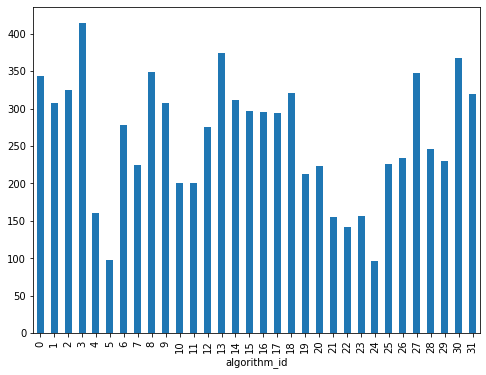

In [ ]:
fig = plt.figure(figsize=(8,6))

df = pd.read_csv(f"{dataset_folder}/dataset.csv")
df.groupby(by='algorithm_id', sort=True).code.count().plot.bar(ylim=0)

df2=df.groupby('algorithm_id')
 


In [ ]:
algorithms = []

noSolutions=[]

for root, dirs, files in os.walk(f"{dataset_folder}/{tokenized_folder}"):
    if len(dirs) < 5:
      count=0
      for dir in dirs:
        algorithms.append(f"{root.split('/')[-1]}/{dir}")   
        count+=1
      if count!=0:
        noSolutions.append(count)
print(noSolutions)
print(algorithms)


[2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 4]
['ctc/kosaraju', 'ctc/tarjan', 'stramosi/lant', 'stramosi/dp_log', 'strmatch/rk', 'strmatch/z-algo', 'strmatch/kmp', 'inv/aib', 'inv/merge', 'schi/seg_tree', 'schi/treap', 'schi/aib', 'inversmodular/euler-toutient', 'inversmodular/extended-euclid-algo', 'evaluare/recursive', 'evaluare/stack', 'evaluare/ast', 'swap/merge', 'swap/aib', 'dmin/bellman', 'dmin/djikstra', 'party/topsort', 'party/kosaraju', 'party/tarjan', 'apm/kruskal', 'apm/prim', 'cmap/distance_search', 'cmap/divide_conquer', 'cmmdc/Euclid-impartiri', 'cmmdc/BUILT_IN', 'cmmdc/Euclid-scaderi', 'cmmdc/bruteforce']


In [ ]:
problemIndex=-1
problemSolutions=0
x=[]
y0=[]

allX=[]
allY=[]


X_list_train=[]
X_list_test=[]
y_list_train=[]
y_list_test=[]

for key, item in df2:
  if(problemSolutions==0):
    x=[]
    y0=[]
    problemIndex+=1
    problemSolutions=noSolutions[problemIndex]
    print(problemSolutions)
  
  x.append(item.code)
  y0.append(item.algorithm_id)
  
  problemSolutions-=1

  if(problemSolutions==0):
    X=pd.concat(x)
    allX.append(X)
    y=pd.concat(y0)
    allY.extend(y)

    train_size_list=[5, 10, 20, 30, 50, 80, 100]
    for i in range(0,len(train_size_list)):
      X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size_list[i], stratify=y)

      X_list_train.append(X_train)
      X_list_test.append(X_test)
      y_list_train.append(y_train)
      y_list_test.append(y_test)

    #print(X.shape)
   
    #print(y.shape)

    #print("------------")
    #print("Training shape")
    #print(X_train.shape)
    #print(y_train.shape)

    #print("------------")
    #print("Testing shape")
    #print(X_test.shape)
    #print(y_test.shape)

algorithms_id = df.algorithm_id.unique()

test_ids = np.array(allY)
test_ids = np.unique(test_ids)

algorithms_test = []

for id in test_ids:
    algorithms_test.append(algorithms[id])
print(algorithms_test)

2
2
3
2
3
2
3
2
2
3
2
2
4
['ctc/kosaraju', 'ctc/tarjan', 'stramosi/lant', 'stramosi/dp_log', 'strmatch/rk', 'strmatch/z-algo', 'strmatch/kmp', 'inv/aib', 'inv/merge', 'schi/seg_tree', 'schi/treap', 'schi/aib', 'inversmodular/euler-toutient', 'inversmodular/extended-euclid-algo', 'evaluare/recursive', 'evaluare/stack', 'evaluare/ast', 'swap/merge', 'swap/aib', 'dmin/bellman', 'dmin/djikstra', 'party/topsort', 'party/kosaraju', 'party/tarjan', 'apm/kruskal', 'apm/prim', 'cmap/distance_search', 'cmap/divide_conquer', 'cmmdc/Euclid-impartiri', 'cmmdc/BUILT_IN', 'cmmdc/Euclid-scaderi', 'cmmdc/bruteforce']


In [ ]:
pattern = "\w+|\+|-|=|!="
stop_w = ["(", ")", ".", "#", ";", ",", ">>", "<<", "{", "}", "[", "]", "'.'", "\"...\"", ">", "<", "std", 
          "fout", "fin", "++", "--", "<=", ">=", "auto", "auto", "bool","break", "case", "char", "char8_t",
          "char16_t", "char32_t", "class", "concept", "const", "consteval", "constexpr", "continue", 
          "decltype", "default", "do", "double", "else", "enum", "explicit","false", "float", "for",
          "if", "inline", "int", "long", "new", "noexcept", "not", "operator", "private", "protected", 
          "public", "return", "short", "signed", "sizeof", "static", "struct", "switch", "template", 
          "this", "true", "union", "unsigned", "using", "virtual", "void", "volatile", "wchar_t", "while"]

In [ ]:
vect = TfidfVectorizer(token_pattern= pattern, stop_words= stop_w)

In [ ]:
matrix=[] 
for item in allX: 
  matrix.append(vect.fit_transform(item.values))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['+', '-', '='] not in stop_words.
  % sorted(inconsistent)


In [ ]:
from scipy import sparse
i=0
for item in matrix:
  sparse.save_npz("tfidfEmbeddings{}.npz".format(i), item)
  i+=1
# use your_matrix_back = sparse.load_npz("yourmatrix.npz") to load

In [ ]:
asd=[]
for i in range(0, len(matrix)):
  asd.append(sparse.load_npz("tfidfEmbeddings{}.npz".format(i)))
  asd[i].shape
  print(asd[i])

  (0, 999)	0.01529666971736986
  (0, 422)	0.015347928252981978
  (0, 2)	0.026353241905935004
  (0, 631)	0.0574433875041085
  (0, 647)	0.05184869417990317
  (0, 616)	0.02688060448440527
  (0, 878)	0.013955473604709527
  (0, 0)	0.014580535276791673
  (0, 983)	0.2649527890406421
  (0, 982)	0.2649527890406421
  (0, 660)	0.2817874284525664
  (0, 815)	0.015119232364685115
  (0, 1159)	0.16450435760115237
  (0, 368)	0.026573031392507242
  (0, 119)	0.023797413563758953
  (0, 1065)	0.01751109849633878
  (0, 480)	0.40291197332940343
  (0, 1250)	0.026187163702302854
  (0, 1111)	0.03988407409343836
  (0, 548)	0.05275185768710973
  (0, 1140)	0.07720196390446277
  (0, 613)	0.010379832367371878
  (0, 742)	0.19810097528482068
  (0, 417)	0.229773550016434
  (0, 564)	0.059681428198990215
  :	:
  (650, 1300)	0.06626836155099543
  (650, 1290)	0.11136623623060378
  (650, 447)	0.021284883549110116
  (650, 550)	0.02848240967706444
  (650, 1045)	0.1505957564463605
  (650, 26)	0.08955641230156672
  (650, 1154)	

In [ ]:
tfidf_pipeline = Pipeline([('tfidf', TfidfVectorizer(token_pattern= pattern, stop_words= stop_w))])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['+', '-', '='] not in stop_words.
  % sorted(inconsistent)


8273
8273
Number of samples: 5
                                    precision    recall  f1-score   support

                      ctc/kosaraju       0.53      1.00      0.69       340
                        ctc/tarjan       0.00      0.00      0.00       306
                     stramosi/lant       0.00      0.00      0.00       323
                   stramosi/dp_log       0.56      1.00      0.72       412
                       strmatch/rk       0.00      0.00      0.00       159
                   strmatch/z-algo       0.00      0.00      0.00        97
                      strmatch/kmp       0.52      1.00      0.68       275
                           inv/aib       1.00      0.99      0.99       223
                         inv/merge       0.99      1.00      1.00       346
                     schi/seg_tree       0.85      0.80      0.82       306
                        schi/treap       0.44      0.92      0.60       199
                          schi/aib       0.00      0.00 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8208
8208
Number of samples: 10
                                    precision    recall  f1-score   support

                      ctc/kosaraju       0.87      0.72      0.79       338
                        ctc/tarjan       0.74      0.88      0.80       303
                     stramosi/lant       1.00      0.03      0.05       321
                   stramosi/dp_log       0.57      1.00      0.72       409
                       strmatch/rk       0.97      0.44      0.61       157
                   strmatch/z-algo       0.00      0.00      0.00        96
                      strmatch/kmp       0.60      0.99      0.74       273
                           inv/aib       1.00      0.99      0.99       221
                         inv/merge       0.99      1.00      1.00       343
                     schi/seg_tree       0.64      0.99      0.78       304
                        schi/treap       0.58      0.48      0.53       198
                          schi/aib       0.76      0.24

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8078
8078
Number of samples: 20
                                    precision    recall  f1-score   support

                      ctc/kosaraju       0.67      0.98      0.80       332
                        ctc/tarjan       0.96      0.46      0.62       299
                     stramosi/lant       0.87      0.59      0.71       316
                   stramosi/dp_log       0.75      0.93      0.83       404
                       strmatch/rk       0.98      0.79      0.88       154
                   strmatch/z-algo       1.00      0.53      0.69        94
                      strmatch/kmp       0.78      0.99      0.87       268
                           inv/aib       1.00      0.99      0.99       217
                         inv/merge       0.99      1.00      1.00       337
                     schi/seg_tree       0.66      1.00      0.80       299
                        schi/treap       0.72      0.14      0.24       196
                          schi/aib       0.55      0.56

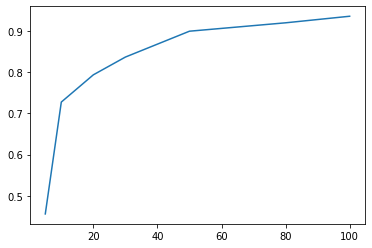

In [ ]:
lr_pipeline_unigram = Pipeline([('tfidf', TfidfVectorizer(token_pattern= pattern, stop_words= stop_w)),
                ('clf', LogisticRegression())
              ])


f1_scores=[]

for j in range(0, len(train_size_list)):
  y_pred_list=[]
  for i in range(0, 13):
    position=len(train_size_list)*i+j
    lr_pipeline_unigram.fit(X_list_train[position], y_list_train[position])

    TfidfVectorizer(input=allX[i].values)

    lr_y_pred_unigram = lr_pipeline_unigram.predict(X_list_test[position])
    y_pred_list.extend(lr_y_pred_unigram)


  y_test=[]

  index=j
  while index<len(y_list_test):
    y_test.extend(y_list_test[index])
    index+=len(train_size_list)
    
  print(len(y_test))
  print(len(y_pred_list))
  print("Number of samples: {}".format(train_size_list[j]))
  print(classification_report(y_true=y_test, y_pred=y_pred_list, target_names=algorithms_test))
  #cm = confusion_matrix(y_test, y_pred_list)
  #plt.figure(figsize=(10, 8))
  #sn.heatmap(cm, annot=True)

  f1_scores.append(f1_score(y_test,y_pred_list,average="weighted"))

plt.plot(train_size_list, f1_scores, label = "line 1")



In [ ]:
import xgboost as xgb

xgb_classifier_ngram = Pipeline(
    steps = [('tfidf', TfidfVectorizer(token_pattern= pattern, stop_words= stop_w, ngram_range=(1, 1))),
                ('clf', xgb.XGBClassifier())
              ])

for j in range(0, len(train_size_list)):
  y_pred_list=[]
  for i in range(0,13):
    position=len(train_size_list)*i+j
    xgb_classifier_ngram.fit(X_list_train[position], y_list_train[position])

    xgb_y_pred_ngram = xgb_classifier_ngram.predict(X_list_test[position])
    y_pred_list.extend(xgb_y_pred_ngram)

  y_test=[]
  index=j
  while index<len(y_list_train):
    y_test.extend(y_list_test[index])
    index+=len(train_size_list)


  print(classification_report(y_true=y_test,y_pred=y_pred_list, target_names=algorithms_test))

#cm = confusion_matrix(y_test, xgb_y_pred_ngram)
#plt.figure(figsize=(10, 8))
#sn.heatmap(cm, annot=True)

#print(xgb_classifier_ngram.named_steps['clf'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['+', '-', '='] not in stop_words.
  % sorted(inconsistent)


XGBoostError: ignored

In [ ]:
features_names = xgb_classifier_ngram.named_steps['tfidf'].get_feature_names()
features_scores = xgb_classifier_ngram.named_steps['clf'].feature_importances_
features_indexes = np.argsort(features_scores)[:20]

features_scores = sorted(features_scores, reverse=True)
cnt = 0
for index in features_indexes:
  print(features_names[index], features_scores[cnt])
  cnt = cnt + 1

!= nan
f nan
end nan
empty nan
e nan
dfstranspose nan
dfst nan
dfsstack nan
dfs nan
ct nan
cstring nan
freopen nan
cstdio nan
close nan
citire nan
c nan
begin nan
b nan
answer nan
a nan


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:546: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


In [ ]:
!pip install wandb -q

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
     |████████████████████████████████| 97 kB 5.7 MB/s 
     |████████████████████████████████| 140 kB 67.7 MB/s 
     |████████████████████████████████| 180 kB 63.5 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import wandb

wandb.init()

tfidf_vectorizer = TfidfVectorizer(token_pattern= pattern, stop_words= stop_w, ngram_range=(1, 1))

X_tfidf = tfidf_vectorizer.fit_transform(X)

dtc = DecisionTreeClassifier()

X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y, test_size = 0.2)

dtc.fit(X_tfidf_train, y_tfidf_train)

y_probas = dtc.predict_proba(X_tfidf_test)
y_pred = dtc.predict(X_tfidf_test)

feature_names = tfidf_vectorizer.get_feature_names()

wandb.sklearn.plot_classifier(dtc, X_tfidf_train, X_tfidf_test, y_tfidf_train,
                              y_tfidf_test, y_pred, y_probas, algorithms)

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: ERROR No API key specified.


<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


KeyboardInterrupt: ignored

In [ ]:
dataset_dmin = df.loc[df['algorithm_id'].isin([1, 30])]
X_dmin = dataset_dmin.code.values
y_dmin = dataset_dmin.algorithm_id.values

X_train_dmin, X_test_dmin, y_train_dmin, y_test_dmin = train_test_split(X_dmin, y_dmin, test_size=0.2)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['+', '-', '='] not in stop_words.
  % sorted(inconsistent)


              precision    recall  f1-score   support

ctc/kosaraju       1.00      1.00      1.00        64
  ctc/tarjan       1.00      1.00      1.00        72

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



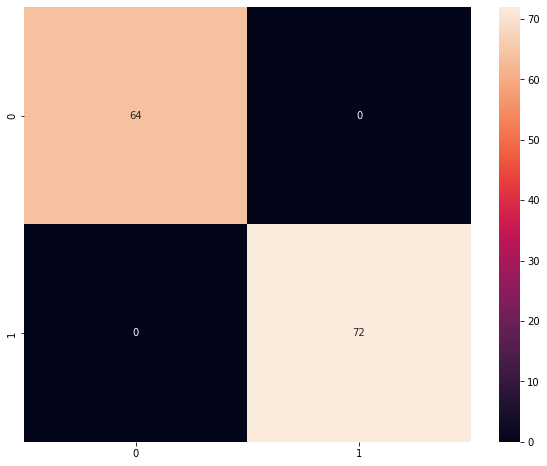

In [ ]:
import xgboost as xgb

xgb_dmin_unigram = Pipeline(
    steps = [('tfidf', TfidfVectorizer(token_pattern= pattern, stop_words= stop_w, ngram_range=(1, 1))),
                ('clf', xgb.XGBClassifier())
              ])

xgb_dmin_unigram.fit(X_train_dmin, y_train_dmin)


xgb_dmin_ypred = xgb_dmin_unigram.predict(X_test_dmin)

print(classification_report(y_test_dmin, xgb_dmin_ypred, target_names=algorithms[0:2]))

cm = confusion_matrix(y_test_dmin, xgb_dmin_ypred)
plt.figure(figsize=(10, 8))
sn.heatmap(cm, annot=True)